## import necessary packages

In [3]:

import pandas as pd
import logging
import sys
import os

sys.path.append(os.path.abspath(os.path.join("../script")))
from utils import percent_missing,format_float, find_agg, missing_values_table,convert_bytes_to_megabytes


Logging configuration

In [4]:
logging.basicConfig(filename='logfile.log',filemode='a',
                    encoding='utf-8', level=logging.DEBUG)


## Extract data from excell file into pandas dataframe

In [5]:
from logging import exception
try:
    df_from_excell = pd.read_excel('../data/Week1_challenge_data_source.xlsx')
except exception:
    logging.warning('file not found or wrong file format')

In [11]:

from impyute.imputation.cs import mice

# start the MICE training
imputed_training = mice(df_from_excell[['Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with 125000B < Vol DL', 'TCP UL Retrans. Vol (Bytes)', 'Nb of sec with 31250B < Vol DL < 125000B',
                        'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 6250B < Vol DL < 31250B', 'TCP DL Retrans. Vol (Bytes)', 'HTTP UL (Bytes)', 'HTTP DL (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)']].values)


In [8]:
print(df_from_excell.columns.tolist())

['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (

In [9]:
print(f" There are {df_from_excell.shape[0]} rows and {df_from_excell.shape[1]} columns")

 There are 150001 rows and 55 columns


In [10]:
df_from_excell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

the data contains 55 columns with dattime, float and string data type. 

In [11]:
df_from_excell.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [12]:
missing_values  = df_from_excell.isna().sum()
missing_values

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

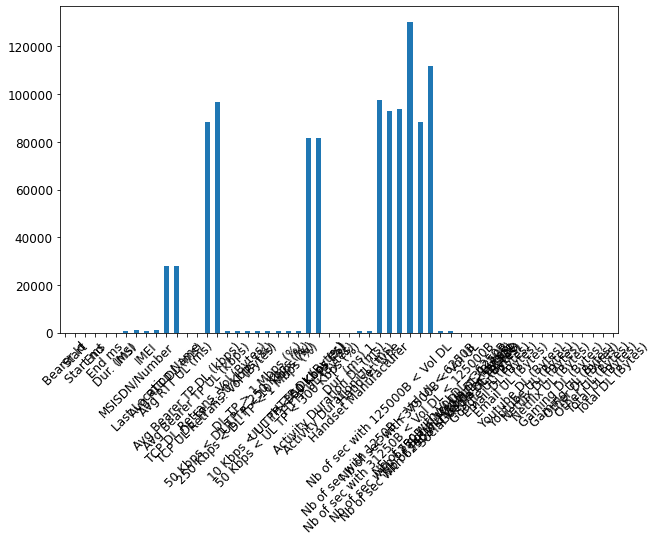

In [13]:
fig = missing_values.plot(kind='bar', fontsize=12,
                          figsize=(10, 6), rot=45).get_figure()
fig.savefig("missing_values_bar_chart.png")


In [14]:
totalCells, missingCount, totalMissing = percent_missing(df_from_excell)
print("The Diabetes dataset contains", round(
    ((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The Diabetes dataset contains 12.49 % missing values.


From the above graph we can observe that there are a lot of missing values. In total there are 12.49 % are missed.

In [20]:
mis_val_table_ren_columns = missing_values_table(df_from_excell)
mis_val_table_ren_columns.head(20)


Your selected dataframe has 55 columns.
There are 40 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Nb of sec with 37500B < Vol UL,130254,86.8,float64
Nb of sec with 6250B < Vol UL < 37500B,111843,74.6,float64
Nb of sec with 125000B < Vol DL,97538,65.0,float64
TCP UL Retrans. Vol (Bytes),96649,64.4,float64
Nb of sec with 31250B < Vol DL < 125000B,93586,62.4,float64
Nb of sec with 1250B < Vol UL < 6250B,92894,61.9,float64
Nb of sec with 6250B < Vol DL < 31250B,88317,58.9,float64
TCP DL Retrans. Vol (Bytes),88146,58.8,float64
HTTP UL (Bytes),81810,54.5,float64
HTTP DL (Bytes),81474,54.3,float64


## Cleaning Data
- drop column with missing value percentage>15
- fill missing values with mean, median, mode, bfill, ffill, etc
- mean and media is for numeric column only

In [24]:
#get columns with % of missing value > 15

drop_column = mis_val_table_ren_columns[mis_val_table_ren_columns['% of Total Values']>15].index
print(drop_column.tolist())


['Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with 125000B < Vol DL', 'TCP UL Retrans. Vol (Bytes)', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 6250B < Vol DL < 31250B', 'TCP DL Retrans. Vol (Bytes)', 'HTTP UL (Bytes)', 'HTTP DL (Bytes)', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)']


In [25]:
df_clean = df_from_excell.copy()

In [29]:
df_clean = df_from_excell.drop(drop_column.tolist(),axis=1)
df_clean.head()



,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


## Transform Data
- change format
- change unit
- scaling / normalization